In [ ]:
""" <데이터 정제 후 csv 파일로 저장>"""

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
books = pd.read_csv("books.csv",error_bad_lines=False)

#데이터 확인
print(books.describe())

#컬럼명 변경
books=books.rename(columns={'# num_pages':'num_pages'})

#outlier 처리
books.loc[books.average_rating==0,'average_rating']=books['average_rating'].mean()

for i in range(books['num_pages'].max(),520,-1):
    books.loc[books.num_pages==i,'num_pages']=books['num_pages'].median()
for i in range(100):
    books.loc[books.num_pages==i,'num_pages']=books['num_pages'].median()
books.loc[books.num_pages==0,'num_pages']=books['num_pages'].median()

for i in range(books['text_reviews_count'].max(),322,-1):
    books.loc[books.text_reviews_count==i,'text_reviews_count']=books['text_reviews_count'].mean()
for i in range(2):
    books.loc[books.text_reviews_count==i,'text_reviews_count']=books['text_reviews_count'].mean()
print(books.describe())

#csv 파일로 저장
books.to_csv('booksdata2.csv',header=True)

In [3]:
import pandas as pd
book = pd.read_csv("book.csv",error_bad_lines=False)
print(book['language_code'].unique())

['eng' 'en-US' 'spa' 'fre' 'en-GB' 'mul' 'ger' 'ara' 'por' 'grc' 'en-CA'
 'enm' 'jpn' 'dan' 'zho' 'nl' 'ita' 'lat' 'srp' 'rus' 'tur' 'msa' 'swe'
 'glg' 'cat' 'wel' 'heb' 'nor' 'gla' 'ale']


   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       3  Harry Potter and the Sorcerer's Stone (Harry P...   
3       4  Harry Potter and the Chamber of Secrets (Harry...   
4       5  Harry Potter and the Prisoner of Azkaban (Harr...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling-Mary GrandPré            4.56  0439785960  9780439785969   
1  J.K. Rowling-Mary GrandPré            4.49  0439358078  9780439358071   
2  J.K. Rowling-Mary GrandPré            4.47  0439554934  9780439554930   
3                J.K. Rowling            4.41  0439554896  9780439554893   
4  J.K. Rowling-Mary GrandPré            4.55  043965548X  9780439655484   

  language_code  num_pages  ratings_count  text_reviews_count  
0           eng      301.0        1944099          458.081310  
1           eng      301.0    

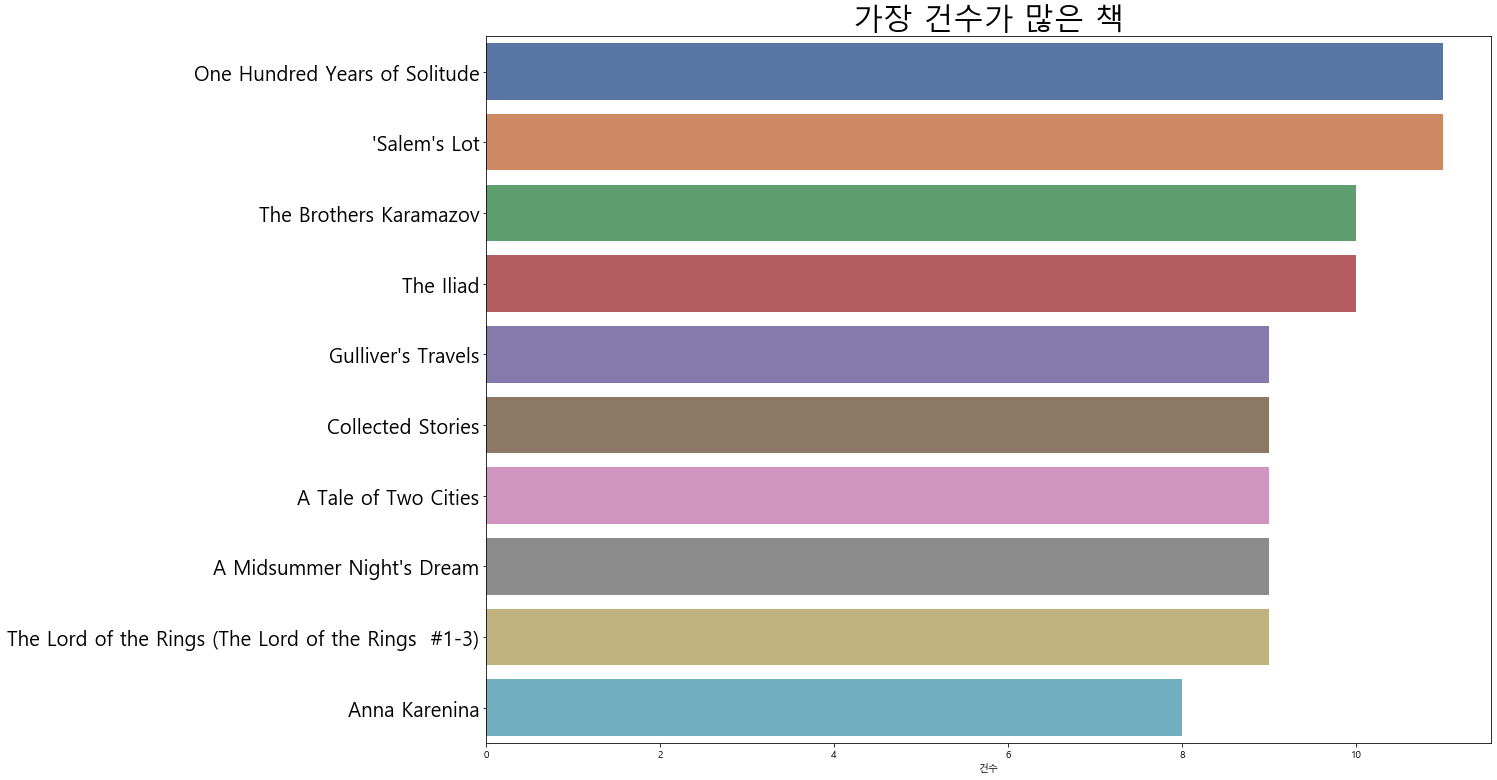

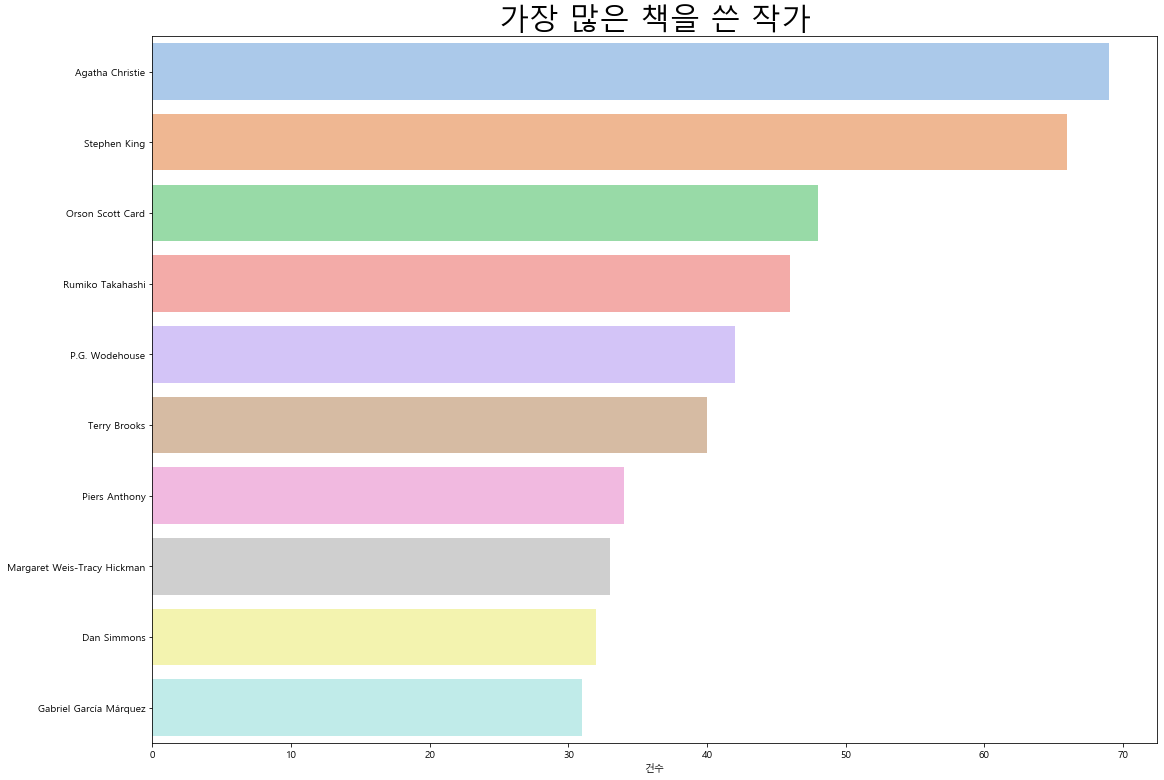

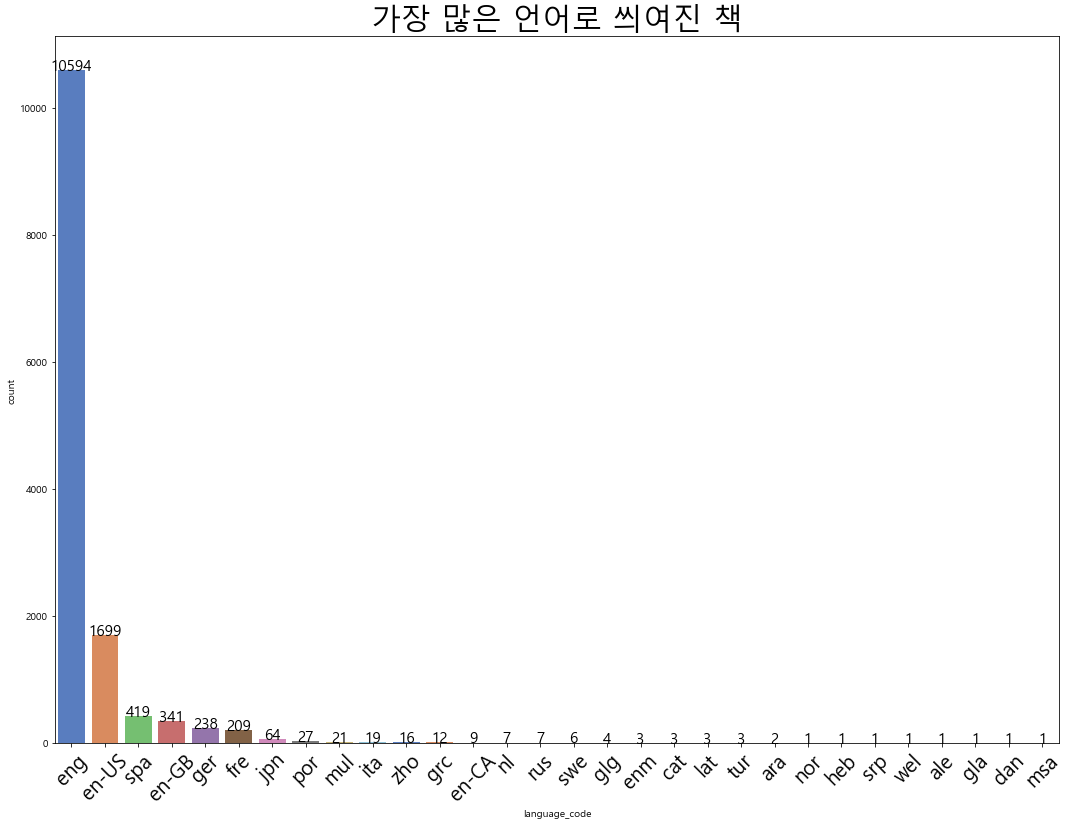

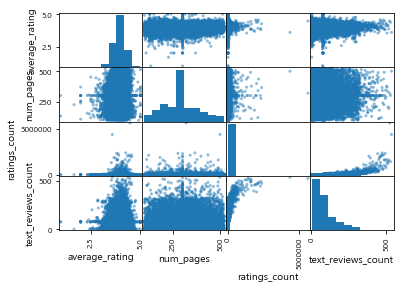

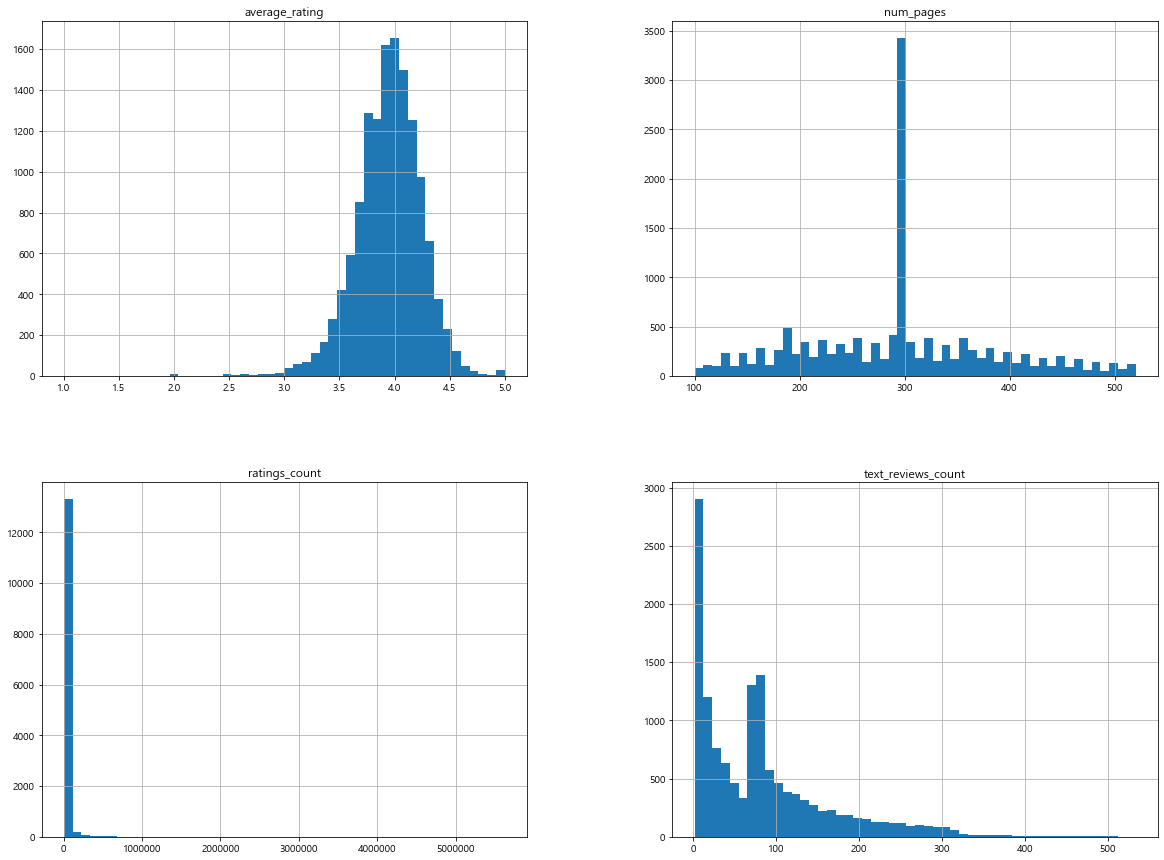

text_reviews_count    1.000000
ratings_count         0.426730
num_pages             0.067087
average_rating        0.025918
isbn13                0.013883
bookID               -0.117584
Name: text_reviews_count, dtype: float64
text_reviews_count    1.000000
ratcount_pages        0.672307
ratings_count         0.426730
num_pages             0.067087
average_rating        0.025918
isbn13                0.013883
bookID               -0.117584
Name: text_reviews_count, dtype: float64
       average_rating     num_pages  ratings_count  ratcount_pages
count    10285.000000  10285.000000   1.028500e+04    10285.000000
mean         3.941405    295.064074   1.791858e+04       70.121127
std          0.297586     90.003104   1.137538e+05      115.316796
min          1.670000    100.000000   0.000000e+00       10.295630
25%          3.780000    234.000000   8.400000e+01       19.949937
50%          3.960000    301.000000   6.410000e+02       30.675723
75%          4.130000    343.000000   4.740000

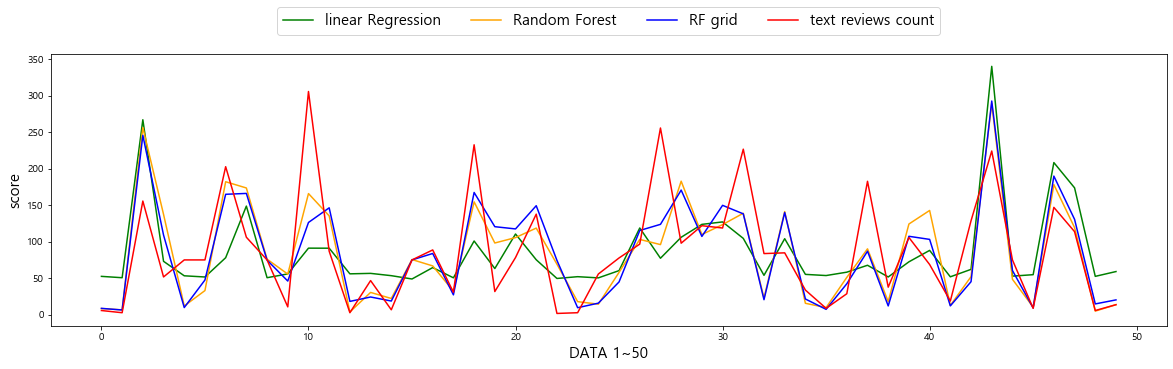

In [128]:
"""데이터 이해를 위한 탐색 및 시각화
    모델 선택과 훈련"""
import pandas as pd
import numpy as np
import random
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,VotingRegressor

import warnings
warnings.filterwarnings('ignore')

book = pd.read_csv("book.csv",error_bad_lines=False)
del book['Unnamed: 0']

#새로운 데이터 확인
print(book.head())
print(book.info())
print(book.describe())

#어떤 책이 가장 많은가?
plt.figure(figsize=(18,13))
c_title=book["title"].value_counts()[:10]
plt.rc('font', family='Malgun Gothic')
a=sns.barplot(x=c_title, y=c_title.index, palette="deep")
a.set_title('가장 건수가 많은 책', fontsize=30)
a.set_xlabel('건수')
a.set_yticklabels(a.get_yticklabels(),fontsize=20)
plt.show()

# 가장 많은 책을 쓴 작가
plt.figure(figsize=(18,13))
atr=book['authors'].value_counts()[:10]
b=sns.barplot(x=atr, y=atr.index, palette="pastel")
b.set_title('가장 많은 책을 쓴 작가', fontsize=30)
b.set_xlabel('건수')
plt.show()

#가장 많은 언어로 씌여진 책
plt.figure(figsize=(18,13))
lang_count=book['language_code'].value_counts()
c=sns.countplot(x='language_code', data=book, palette="muted", order=lang_count.index)
for i in range(lang_count.shape[0]):
    c.text(x=i, y=lang_count[i], s=lang_count[i], fontsize=15, horizontalalignment='center')
c.set_title('가장 많은 언어로 씌여진 책', fontsize=30)
c.set_xticklabels(c.get_xticklabels(),fontsize=20, rotation=45)
plt.show()

#산포도, 히스토그램 확인
v=["average_rating","num_pages","ratings_count","text_reviews_count"]
scatter_matrix(book[v])
book[v].hist(bins=50, figsize=(20,15))
plt.show()

#상관관계 확인
corr_matrix=book.corr()
print(corr_matrix["text_reviews_count"].sort_values(ascending=False))

#파생변수 생성 후 상관관계 확인
book["ratcount_pages"]=np.sqrt(book["ratings_count"]+book["num_pages"])
corr_matrix=book.corr()
print(corr_matrix["text_reviews_count"].sort_values(ascending=False))

#훈련 세트와 테스트 세트 나누기
train_set, test_set=train_test_split(book, test_size=0.25, random_state=42)

#예측변수와 레이블 분리
book=train_set.drop("text_reviews_count",axis=1)
book_labels=train_set["text_reviews_count"].copy()

#수치형, 범주형 데이터 복사본 생성
cat=["bookID","title","authors","isbn","isbn13","language_code"]
book_num=book.drop(book[cat],axis=1)
book_cat=book[cat]
print(book_num.describe())

#imputer를 사용하여 넘파이로 변경
imputer=Imputer(strategy="median")
imputer.fit(book_num)
x=imputer.transform(book_num)

#넘파이를 다시 판다스 데이터프레임으로 변경
book_tr=pd.DataFrame(x, columns=book_num.columns, index=list(book.index.values))

#정규화 스케일링
scaler=StandardScaler()
scaler.fit(x)

#필요한 특성을 선택하여 데이터프레임을 넘파이 배열로 바꿔주는 클래스 생성
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

#교차검증 출력 함수
def display_scores(scores):
    print("점수 :",scores)
    print("평균 :",scores.mean())
    print("점수의 표준편차 :",scores.std())

#숫자 특성을 처리하는 파이프라인
num_attribs = list(book_num)
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attribs)), 
    ('imputer',Imputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

"""#범주형 특성을 처리하는 파이프라인 왜 안될까..
cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(book_cat)),
])

# 두 파이프라인을 합친다
full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
])"""

book_prepared=num_pipeline.fit_transform(book_num) #넘파이
print(book_prepared.argmax())

#선형회귀
lin_reg=LinearRegression()
lin_reg=lin_reg.fit(book_prepared,book_labels)
some_data_prepared=num_pipeline.transform(book)
print(lin_reg.predict(some_data_prepared))
#print(list(book_labels))

#결정트리
tree_reg=DecisionTreeRegressor()
tree_reg.fit(book_prepared, book_labels)
print(tree_reg.predict(some_data_prepared))
#print(list(book_labels))

#SVM 회귀
svm_reg=LinearSVR(epsilon=1.5)
svm_reg.fit(book_prepared, book_labels)
print(svm_reg.predict(some_data_prepared))

#RMSE(평균 제곱근 편차)를 통한 평가
book_predictions=lin_reg.predict(book_prepared)
lin_mse=mean_squared_error(book_labels, book_predictions)
lin_rmse=np.sqrt(lin_mse)
print('선형회귀의 RMSE',lin_rmse)

book_predictions=tree_reg.predict(book_prepared)
tree_mse=mean_squared_error(book_labels, book_predictions)
tree_rmse=np.sqrt(tree_mse)
print('결정트리의 RMSE',tree_rmse)

book_predictions=svm_reg.predict(book_prepared)
svm_mse=mean_squared_error(book_labels, book_predictions)
svm_rmse=np.sqrt(svm_mse)
print('SVM의 RMSE',svm_rmse)

#교차검증을 통한 평가
lin_scores=cross_val_score(lin_reg,book_prepared,book_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
print('='*10,'선형회귀 교차검증','='*10)
display_scores(lin_rmse_scores)

tree_scores=cross_val_score(tree_reg,book_prepared,book_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-tree_scores)
print('='*10,'결정트리 교차검증','='*10)
display_scores(tree_rmse_scores)
#결정트리의 평가 점수가 크게 다른 걸로 보아, 과대적합된 것으로 볼 수 있다

svm_scores=cross_val_score(svm_reg,book_prepared,book_labels,scoring="neg_mean_squared_error",cv=10)
svm_rmse_scores=np.sqrt(-svm_scores)
print('='*10,'SVM 교차검증','='*10)
display_scores(svm_rmse_scores)

#그리드 탐색, 결정트리의 과대적합을 피하기 위해 랜덤 포레스트 진행
forest_reg=RandomForestRegressor()
forest_reg.fit(book_prepared, book_labels)
forest_scores=cross_val_score(forest_reg,book_prepared,book_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
print('='*10,'RandomForest 교차검증','='*10)
display_scores(forest_rmse_scores)

p_grid = [
        {'n_estimators':[3,10,30],'max_features':[4]},
         {'bootstrap':[False],'n_estimators':[3,10],'max_features':[4]},
]

for_grid_search = GridSearchCV(forest_reg, p_grid, cv=5,
                          scoring ="neg_mean_squared_error", return_train_score=True)
for_grid_search.fit(book_prepared, book_labels)
print('최적의 조합 : ',for_grid_search.best_params_)
print('최적의 추정기 : ', for_grid_search.best_estimator_)

#앙상블 학습
r1 = lin_reg
r2 = svm_reg
er = VotingRegressor([('lr',r1),('sr',r2)])
voting_scores=cross_val_score(er, book_prepared, book_labels, scoring="neg_mean_squared_error",cv=10)
voting_rmse_scores=np.sqrt(-voting_scores)
print('='*10,'Voting Classifier 교차검증','='*10)
display_scores(voting_rmse_scores)
er.fit(book_prepared, book_labels).predict(book_prepared)
book_predictions=er.predict(book_prepared)
voting_mse=mean_squared_error(book_labels, book_predictions)
voting_rmse=np.sqrt(voting_mse)
print('Voting Classifier의 RMSE',voting_rmse)
print("="*60)

#최상의 모델과 오차 분석
feature_importances = for_grid_search.best_estimator_.feature_importances_
print("각 특성의 상대적인 중요도 : ", feature_importances)
print("대응되는 특성 표시 : ",sorted(zip(feature_importances, num_attribs), reverse=True))

#테스트 세트로 평가
book_test=test_set.drop("text_reviews_count",axis=1)
book_labels_test=test_set["text_reviews_count"].copy()
book_test_prepared = num_pipeline.transform(book_test)

final_predictions = lin_reg.predict(book_test_prepared)
final_mse = mean_squared_error(book_labels_test,final_predictions)
final_rmse = np.sqrt(final_mse)

final_predictions2 = tree_reg.predict(book_test_prepared)
final_mse2 = mean_squared_error(book_labels_test,final_predictions2)
final_rmse2 = np.sqrt(final_mse2)

final_predictions3 = svm_reg.predict(book_test_prepared)
final_mse3 = mean_squared_error(book_labels_test,final_predictions3)
final_rmse3 = np.sqrt(final_mse3)

final_predictions4 = er.predict(book_test_prepared)
final_mse4 = mean_squared_error(book_labels_test,final_predictions4)
final_rmse4 = np.sqrt(final_mse4)

final_predictions5 = forest_reg.predict(book_test_prepared)
final_mse5 = mean_squared_error(book_labels_test,final_predictions5)
final_rmse5 = np.sqrt(final_mse5)

final_predictions6 = for_grid_search.predict(book_test_prepared)
final_mse6 = mean_squared_error(book_labels_test,final_predictions6)
final_rmse6 = np.sqrt(final_mse6)
print("="*60)
print("선형회귀의 테스트 RMSE : ",final_rmse)
print("결정트리의 테스트 RMSE : ",final_rmse2)
print("SVM의 테스트 RMSE : ",final_rmse3)
print("투표 기반의 테스트 RMSE : ",final_rmse4)
print("랜덤 포레스트의 테스트 RMSE : ",final_rmse5)
print("Grid search의 테스트 RMSE : ",final_rmse6)

#점수를 바탕으로 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(lin_reg.predict(book_test_prepared)[:50],label="linear Regression", color='g')
plt.plot(forest_reg.predict(book_test_prepared)[:50],label="Random Forest", color='orange')
plt.plot(for_grid_search.predict(book_test_prepared)[:50],label="RF grid", color='b')
plt.plot(book_labels_test_n[:50],label="text reviews count", color="r")
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2),ncol=4,fancybox=True,shadow=False,fontsize=15)
plt.xlabel('DATA 1~50',size=15)
plt.ylabel('score',size=15)
plt.show()